<a href="https://colab.research.google.com/github/jgshim/ATAA/blob/main/ATAA_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
raw_df = pd.read_csv('gdrive/MyDrive/ATAA/data_df.csv')
raw_df.head()

,Unnamed: 0,ID,LDL,glc,Cr,CRP,Sex,Age,Ht,Wt,...,BMI,Waist,SBP,DBP,HR,DM,HTN,DL,Smoke,Aneurysm
0,1,1278033,107.0,92.0,0.9,0.08,1,37,185.7,83.7,...,24.30,91.0,110.0,80.0,56.0,0.0,NaN,0.0,1.0,0
1,2,298800,89.0,84.0,1.1,0.03,1,47,168.0,62.4,...,22.09,74.8,120.0,68.0,81.0,0.0,0.0,0.0,1.0,0
2,3,1152458,99.0,87.0,0.7,0.20,2,52,155.0,61.8,...,25.74,82.8,111.0,70.0,72.0,NaN,1.0,0.0,0.0,0
3,4,25434,139.0,92.0,1.1,0.12,1,38,177.4,91.9,...,29.20,97.0,120.0,80.0,60.0,0.0,0.0,0.0,0.0,0
4,5,85529,133.0,103.0,1.0,0.06,1,47,174.0,72.6,...,23.98,85.0,120.0,80.0,69.0,NaN,1.0,0.0,1.0,0


In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Data processing and exploration

In [ ]:
raw_df[raw_df.duplicated(subset="ID")]

,Unnamed: 0,ID,LDL,glc,Cr,CRP,Sex,Age,Ht,Wt,...,BMI,Waist,SBP,DBP,HR,DM,HTN,DL,Smoke,Aneurysm


In [ ]:
# We don't want the 'Unnamed: 0', 'ID', 'Ht', 'Wt' column.
raw_df1 = raw_df.drop(['Unnamed: 0', 'ID', 'Ht', 'Wt'], axis=1)

In [ ]:
raw_df1.shape

(18382, 17)

In [ ]:
print(raw_df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18382 entries, 0 to 18381
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LDL       18281 non-null  float64
 1   glc       18352 non-null  float64
 2   Cr        18282 non-null  float64
 3   CRP       17738 non-null  float64
 4   Sex       18382 non-null  int64  
 5   Age       18382 non-null  int64  
 6   BSA       18382 non-null  float64
 7   BMI       18257 non-null  float64
 8   Waist     18330 non-null  float64
 9   SBP       18346 non-null  float64
 10  DBP       18346 non-null  float64
 11  HR        18262 non-null  float64
 12  DM        16618 non-null  float64
 13  HTN       16399 non-null  float64
 14  DL        18246 non-null  float64
 15  Smoke     18074 non-null  float64
 16  Aneurysm  18382 non-null  int64  
dtypes: float64(14), int64(3)
memory usage: 2.4 MB
None


In [ ]:
print((raw_df1.isnull().mean() * 100).to_string())

LDL          0.549451
glc          0.163203
Cr           0.544010
CRP          3.503427
Sex          0.000000
Age          0.000000
BSA          0.000000
BMI          0.680013
Waist        0.282885
SBP          0.195844
DBP          0.195844
HR           0.652813
DM           9.596344
HTN         10.787727
DL           0.739854
Smoke        1.675552
Aneurysm     0.000000


In [ ]:
print(raw_df1.count())

LDL         18281
glc         18352
Cr          18282
CRP         17738
Sex         18382
Age         18382
BSA         18382
BMI         18257
Waist       18330
SBP         18346
DBP         18346
HR          18262
DM          16618
HTN         16399
DL          18246
Smoke       18074
Aneurysm    18382
dtype: int64


In [ ]:
num_rows = raw_df1.shape[0]
num_missing = num_rows - raw_df1.count()
print(num_missing)

LDL          101
glc           30
Cr           100
CRP          644
Sex            0
Age            0
BSA            0
BMI          125
Waist         52
SBP           36
DBP           36
HR           120
DM          1764
HTN         1983
DL           136
Smoke        308
Aneurysm       0
dtype: int64


In [ ]:
raw_df1.shape

(18382, 17)

In [ ]:
print(np.count_nonzero(raw_df1['Aneurysm'].isnull()))

0


In [ ]:
raw_df1.describe()  # 17개 variables (16 feature, 1 label), number of samples  : 18382

,LDL,glc,Cr,CRP,Sex,Age,BSA,BMI,Waist,SBP,DBP,HR,DM,HTN,DL,Smoke,Aneurysm
count,18281.000000,18352.000000,18282.000000,17738.000000,18382.000000,18382.000000,18382.000000,18257.000000,18330.000000,18346.000000,18346.000000,18262.000000,16618.000000,16399.000000,18246.000000,18074.000000,18382.000000
mean,121.870521,95.133609,0.940472,0.123204,1.091666,41.067348,1.823601,24.127681,84.096039,116.324049,74.244467,64.484777,0.032254,0.102506,0.081662,0.802036,0.062398
std,30.448281,14.939809,0.147722,0.329068,0.288561,7.285241,0.217419,3.039962,7.891645,11.790856,8.714954,9.094474,0.176680,0.303322,0.273856,0.398476,0.241884
min,20.000000,55.000000,0.300000,0.010000,1.000000,18.000000,0.000000,0.000000,54.200000,80.000000,40.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.000000,88.000000,0.900000,0.030000,1.000000,35.000000,1.740923,22.100000,79.000000,110.000000,70.000000,58.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,120.000000,93.000000,0.900000,0.050000,1.000000,40.000000,1.841174,24.000000,84.000000,115.000000,74.000000,64.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,141.000000,99.000000,1.000000,0.110000,1.000000,45.000000,1.936033,26.000000,89.000000,125.000000,80.000000,70.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,307.000000,321.000000,4.500000,13.790000,2.000000,86.000000,2.652724,48.700000,139.000000,210.000000,140.000000,143.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
raw_df1[['LDL','glc','Cr','CRP','Age','BSA','BMI','Waist','SBP','DBP','HR']].describe()

,LDL,glc,Cr,CRP,Age,BSA,BMI,Waist,SBP,DBP,HR
count,18281.000000,18352.000000,18282.000000,17738.000000,18382.000000,18382.000000,18257.000000,18330.000000,18346.000000,18346.000000,18262.000000
mean,121.870521,95.133609,0.940472,0.123204,41.067348,1.823601,24.127681,84.096039,116.324049,74.244467,64.484777
std,30.448281,14.939809,0.147722,0.329068,7.285241,0.217419,3.039962,7.891645,11.790856,8.714954,9.094474
min,20.000000,55.000000,0.300000,0.010000,18.000000,0.000000,0.000000,54.200000,80.000000,40.000000,36.000000
25%,101.000000,88.000000,0.900000,0.030000,35.000000,1.740923,22.100000,79.000000,110.000000,70.000000,58.000000
50%,120.000000,93.000000,0.900000,0.050000,40.000000,1.841174,24.000000,84.000000,115.000000,74.000000,64.000000
75%,141.000000,99.000000,1.000000,0.110000,45.000000,1.936033,26.000000,89.000000,125.000000,80.000000,70.000000
max,307.000000,321.000000,4.500000,13.790000,86.000000,2.652724,48.700000,139.000000,210.000000,140.000000,143.000000


### Examine the class label imbalance

Let's look at the dataset imbalance:

In [ ]:
neg, pos = np.bincount(raw_df1['Aneurysm'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 18382
    Positive: 1147 (6.24% of total)



This shows the small fraction of positive samples.

In [ ]:
cleaned_df = raw_df1.copy()

In [ ]:
data = cleaned_df.drop(['Aneurysm'], axis=1)
target =cleaned_df['Aneurysm']

In [ ]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df, train_target, test_target = train_test_split(data, target, test_size=0.2, stratify=target, random_state=99)

In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14705 entries, 9694 to 14824
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LDL     14622 non-null  float64
 1   glc     14683 non-null  float64
 2   Cr      14623 non-null  float64
 3   CRP     14182 non-null  float64
 4   Sex     14705 non-null  int64  
 5   Age     14705 non-null  int64  
 6   BSA     14705 non-null  float64
 7   BMI     14601 non-null  float64
 8   Waist   14663 non-null  float64
 9   SBP     14677 non-null  float64
 10  DBP     14677 non-null  float64
 11  HR      14604 non-null  float64
 12  DM      13277 non-null  float64
 13  HTN     13120 non-null  float64
 14  DL      14595 non-null  float64
 15  Smoke   14462 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.9 MB
None


# Imputation and Standardization
To handle the missing data, we obtaineed the mean value of continuous variables or the mode value of categorical variables from the training data set for each feature and used the missing data with the mean or mode value in both the training and testing data sets.
We then performed standardization of the data set.

In [ ]:
mean_LDL = round(train_df['LDL'].mean(axis=0))  # LDL 열의 평균 계산(NaN값 제외)
print(mean_LDL)
mean_glc = round(train_df['glc'].mean(axis=0))  # glc 열의 평균 계산(NaN값 제외)
print(mean_glc)
mean_Cr = round(train_df['Cr'].mean(axis=0))  # Cr 열의 평균 계산(NaN값 제외)
print(mean_Cr)
mean_CRP = round(train_df['CRP'].mean(axis=0))  # CRP 열의 평균 계산(NaN값 제외)
print(mean_CRP)
mean_Age = round(train_df['Age'].mean(axis=0))  # Age 열의 평균 계산(NaN값 제외)
print(mean_Age)
mean_BSA = round(train_df['BSA'].mean(axis=0))  # BSA 열의 평균 계산(NaN값 제외)
print(mean_BSA)
mean_BMI = round(train_df['BMI'].mean(axis=0))  # BMI 열의 평균 계산(NaN값 제외)
print(mean_BMI)
mean_Waist = round(train_df['Waist'].mean(axis=0))  # Waist 열의 평균 계산(NaN값 제외)
print(mean_Waist)
mean_SBP = round(train_df['SBP'].mean(axis=0))  # SBP 열의 평균 계산(NaN값 제외)
print(mean_SBP)
mean_DBP = round(train_df['DBP'].mean(axis=0))  # DBP 열의 평균 계산(NaN값 제외)
print(mean_DBP)
mean_HR = round(train_df['HR'].mean(axis=0))  # HR 열의 평균 계산(NaN값 제외)
print(mean_HR)

122
95
1
0
41
2
24
84
116
74
64


In [ ]:
most_freq_Sex = train_df['Sex'].value_counts(dropna=False).idxmax()
print("most_freq_Sex : ", most_freq_Sex)
most_freq_DM = train_df['DM'].value_counts(dropna=False).idxmax()
print("most_freq_DM : ", most_freq_DM)
most_freq_HTN = train_df['HTN'].value_counts(dropna=False).idxmax()
print("most_freq_HTN : ", most_freq_HTN)
most_freq_DL = train_df['DL'].value_counts(dropna=False).idxmax()
print("most_freq_DL : ", most_freq_DL)
most_freq_Smoke = train_df['Smoke'].value_counts(dropna=False).idxmax()
print("most_freq_Smoke : ", most_freq_Smoke)

most_freq_Sex :  1
most_freq_DM :  0.0
most_freq_HTN :  0.0
most_freq_DL :  0.0
most_freq_Smoke :  1.0


In [ ]:
train_df['LDL'].fillna(mean_LDL, inplace=True)
train_df['glc'].fillna(mean_glc, inplace=True)
train_df['Cr'].fillna(mean_Cr, inplace=True)
train_df['CRP'].fillna(mean_CRP, inplace=True)
train_df['Age'].fillna(mean_Age, inplace=True)
train_df['BSA'].fillna(mean_BSA, inplace=True)
train_df['BMI'].fillna(mean_BMI, inplace=True)
train_df['Waist'].fillna(mean_Waist, inplace=True)
train_df['SBP'].fillna(mean_SBP, inplace=True)
train_df['DBP'].fillna(mean_DBP, inplace=True)
train_df['HR'].fillna(mean_HR, inplace=True)

<ipython-input-29-93407a8d6411>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LDL'].fillna(mean_LDL, inplace=True)
<ipython-input-29-93407a8d6411>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
test_df['LDL'].fillna(mean_LDL, inplace=True)
test_df['glc'].fillna(mean_glc, inplace=True)
test_df['Cr'].fillna(mean_Cr, inplace=True)
test_df['CRP'].fillna(mean_CRP, inplace=True)
test_df['Age'].fillna(mean_Age, inplace=True)
test_df['BSA'].fillna(mean_BSA, inplace=True)
test_df['BMI'].fillna(mean_BMI, inplace=True)
test_df['Waist'].fillna(mean_Waist, inplace=True)
test_df['SBP'].fillna(mean_SBP, inplace=True)
test_df['DBP'].fillna(mean_DBP, inplace=True)
test_df['HR'].fillna(mean_HR, inplace=True)

<ipython-input-30-ffe3afe2e4fa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['LDL'].fillna(mean_LDL, inplace=True)
<ipython-input-30-ffe3afe2e4fa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
train_df['Sex'].fillna(most_freq_Sex, inplace=True)
train_df['DM'].fillna(most_freq_DM, inplace=True)
train_df['HTN'].fillna(most_freq_HTN, inplace=True)
train_df['DL'].fillna(most_freq_DL, inplace=True)
train_df['Smoke'].fillna(most_freq_Smoke, inplace=True)

<ipython-input-31-78a5e0c3d608>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Sex'].fillna(most_freq_Sex, inplace=True)
<ipython-input-31-78a5e0c3d608>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
test_df['Sex'].fillna(most_freq_Sex, inplace=True)
test_df['DM'].fillna(most_freq_DM, inplace=True)
test_df['HTN'].fillna(most_freq_HTN, inplace=True)
test_df['DL'].fillna(most_freq_DL, inplace=True)
test_df['Smoke'].fillna(most_freq_Smoke, inplace=True)

<ipython-input-32-fc87a6016918>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Sex'].fillna(most_freq_Sex, inplace=True)
<ipython-input-32-fc87a6016918>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
train_df.head()

,LDL,glc,Cr,CRP,Sex,Age,BSA,BMI,Waist,SBP,DBP,HR,DM,HTN,DL,Smoke
9694,137.0,92.0,0.8,0.18,1,37,1.769983,24.20,80.9,120.0,70.0,71.0,0.0,0.0,0.0,1.0
9572,169.0,90.0,0.9,0.23,1,34,1.965163,28.20,91.5,140.0,90.0,63.0,0.0,1.0,0.0,1.0
9566,131.0,92.0,0.8,0.03,1,48,1.876243,26.90,91.0,112.0,70.0,63.0,0.0,0.0,0.0,1.0
18044,130.0,89.0,0.9,0.06,1,43,2.024077,28.31,94.0,106.0,74.0,65.0,0.0,0.0,0.0,1.0
5553,100.0,87.0,1.2,0.02,1,35,1.881418,27.10,88.9,120.0,72.0,72.0,0.0,0.0,0.0,1.0


In [ ]:
train_df.to_csv("gdrive/MyDrive/ATAA/train_df.csv", mode='w')
test_df.to_csv("gdrive/MyDrive/ATAA/test_df.csv", mode='w')
train_target.to_csv("gdrive/MyDrive/ATAA/train_target.csv", mode='w')
test_target.to_csv("gdrive/MyDrive/ATAA/test_target.csv", mode='w')

In [ ]:
# Feature number choice
train_df = train_df[["Age","HTN","Waist","Cr","Smoke","BMI","CRP","SBP","DL","DBP","BSA","Sex","HR","LDL","glc"]]
test_df = test_df[["Age","HTN","Waist","Cr","Smoke","BMI","CRP","SBP","DL","DBP","BSA","Sex","HR","LDL","glc"]]

In [ ]:
test_df.head(20)

,Age,HTN,Waist,Cr,Smoke,BMI,CRP,SBP,DL,DBP,BSA,Sex,HR,LDL,glc
3595,50,0.0,79.2,1.1,1.0,22.07,0.03,100.0,0.0,64.0,1.755300,1,60.0,97.0,83.0
9140,39,0.0,89.0,1.0,1.0,24.70,0.03,109.0,0.0,70.0,2.030544,1,68.0,84.0,89.0
9810,36,0.0,72.9,1.0,1.0,21.20,0.03,130.0,0.0,80.0,1.576720,1,70.0,97.0,95.0
3651,40,0.0,88.8,1.0,0.0,24.42,0.03,110.0,1.0,70.0,1.782209,1,73.0,118.0,89.0
7897,38,0.0,90.5,0.9,1.0,24.70,0.04,110.0,0.0,75.0,1.951929,1,59.0,159.0,85.0
18307,48,0.0,89.0,1.0,1.0,24.90,0.40,100.0,0.0,68.0,1.712359,1,51.0,156.0,75.0
10888,45,0.0,80.0,1.1,1.0,21.90,0.03,120.0,0.0,80.0,1.712703,1,70.0,104.0,77.0
12267,38,0.0,77.5,1.0,0.0,22.06,0.03,112.0,0.0,70.0,1.820943,1,55.0,82.0,95.0
514,40,0.0,95.8,0.7,1.0,28.40,0.08,130.0,0.0,80.0,2.028881,1,61.0,113.0,89.0
2710,36,0.0,85.0,0.9,1.0,25.50,0.03,133.0,0.0,82.0,1.854537,1,64.0,155.0,87.0


In [ ]:
print((test_df.isnull().mean() * 100).to_string())

Age      0.0
HTN      0.0
Waist    0.0
Cr       0.0
Smoke    0.0
BMI      0.0
CRP      0.0
SBP      0.0
DL       0.0
DBP      0.0
BSA      0.0
Sex      0.0
HR       0.0
LDL      0.0
glc      0.0


In [ ]:
print((train_target.to_frame().isnull().mean() * 100).to_string())

Aneurysm    0.0


In [ ]:
print(train_target.value_counts(dropna=False))
print(train_target.shape)

Aneurysm
0    13787
1      918
Name: count, dtype: int64
(14705,)


In [ ]:
train_df, val_df, train_target, val_target = train_test_split(train_df, train_target, test_size=0.25, stratify=train_target, random_state=99)

# Form np arrays of labels and features.
train_labels = np.array(train_target)
bool_train_labels = train_labels != 0
val_labels = np.array(val_target)
test_labels = np.array(test_target)

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (11028,)
Validation labels shape: (3677,)
Test labels shape: (3677,)
Training features shape: (11028, 15)
Validation features shape: (3677, 15)
Test features shape: (3677, 15)


## Define the model and metrics

Define a function that creates a  5-layer DNN (deep neural network) with an input layer, 3 FC layers as hidden layers, dropout layers to reduce overfitting, and an output sigmoid layer that returns the probability of a ascending thoracic aorta aneurysm:

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  input = keras.layers.Input(shape=(train_features.shape[-1],), name='Input')
  x = keras.layers.Dense(30, activation='relu', name='FC1')(input)
  x = keras.layers.Dropout(0.5, name='DO1')(x)
  x = keras.layers.Dense(16, activation='relu', name='FC2')(x)
  x = keras.layers.Dropout(0.5, name='DO2')(x)
  x = keras.layers.Dense(8, activation='relu', name='FC3')(x)
  x = keras.layers.Dropout(0.5, name='DO3')(x)
  output = keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias, name='Output')(x)

  model = keras.models.Model(inputs=input, outputs=output)

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

## Baseline model

In [ ]:
EPOCHS = 500
BATCH_SIZE = 128

earlyStopping = keras.callbacks.EarlyStopping(
    monitor='val_prc',
    mode='max',
    verbose=1,
    patience=30)

In [ ]:
model = make_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 30)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DO1 (Dropout)                   │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC2 (Dense)                     │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DO2 (Dropout)                   │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC3 (Dense)                     │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DO3 (Dropout)                   │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Test run the model:

In [ ]:
model.predict(train_features[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


array([[0.60356313],
       [0.6103423 ],
       [0.5524766 ],
       [0.6283434 ],
       [0.5897192 ],
       [0.582877  ],
       [0.58440584],
       [0.47885174],
       [0.5599895 ],
       [0.5801488 ]], dtype=float32)

In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights.weights.h5')
model.save_weights(initial_weights)

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('ATAA Detected (True Negatives): ', cm[0][0])
  print('ATAA Incorrectly Detected (False Positives): ', cm[0][1])
  print('ATAA Missed (False Negatives): ', cm[1][0])
  print('ATAA Detected (True Positives): ', cm[1][1])
  print('Total ATAA: ', np.sum(cm[1]))

## Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(train_features, train_labels)

### Train on the resampled data using smote

Now try training the model with the resampled data set.

The data was balanced by smote algorithm.

Balancing the dataset by smote:

In [ ]:
smote_model = make_model()
smote_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = smote_model.layers[-1]
output_layer.bias.assign([0])

path = 'smote_best_model.h5'

modelCheckpoint = keras.callbacks.ModelCheckpoint(
    filepath=path,
    monitor='val_loss',
    save_best_only=True)

# 복잡한 모델에서는 patience=10에서 30번까지로 설정

smote_history = smote_model.fit(
    X_smote,
    y_smote,
    # These are not real epochs
    #steps_per_epoch=len(X_smote)/BATCH_SIZE,
    steps_per_epoch = 160,
    batch_size=BATCH_SIZE,
    epochs=10*EPOCHS,
    callbacks=[modelCheckpoint, earlyStopping],
    validation_data=(val_features, val_labels))

Epoch 1/5000
152/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5913 - auc: 0.6033 - fn: 2606.3027 - fp: 3144.0657 - loss: 0.8297 - prc: 0.3976 - precision: 0.4091 - recall: 0.4606 - tn: 5217.6187 - tp: 2501.0132

160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5891 - auc: 0.6020 - fn: 2711.7019 - fp: 3310.9626 - loss: 0.8256 - prc: 0.4020 - precision: 0.4133 - recall: 0.4663 - tn: 5337.4038 - tp: 2684.1367 - val_accuracy: 0.3522 - val_auc: 0.7000 - val_fn: 23.0000 - val_fp: 2359.0000 - val_loss: 0.7021 - val_prc: 0.1425 - val_precision: 0.0807 - val_recall: 0.9000 - val_tn: 1088.0000 - val_tp: 207.0000
Epoch 2/5000
  2/160 ━━━━━━━━━━━━━━━━━━━━ 5:26 2s/step - accuracy: 0.5688 - auc: 0.5944 - fn: 16.0000 - fp: 54.5000 - loss: 0.6717 - prc: 0.5323 - precision: 0.5221 - recall: 0.7942 - tn: 32.0000 - tp: 61.5000

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5749 - auc: 0.5910 - fn: 20.9375 - fp: 63.8812 - loss: 0.6728 - prc: 0.5719 - precision: 0.5551 - recall: 0.7921 - tn: 34.9625 - tp: 79.7688 - val_accuracy: 0.3519 - val_auc: 0.7028 - val_fn: 23.0000 - val_fp: 2360.0000 - val_loss: 0.7019 - val_prc: 0.1450 - val_precision: 0.0806 - val_recall: 0.9000 - val_tn: 1087.0000 - val_tp: 207.0000
Epoch 3/5000
151/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5679 - auc: 0.6026 - fn: 1207.1125 - fp: 2961.8809 - loss: 0.6736 - prc: 0.6012 - precision: 0.5504 - recall: 0.7493 - tn: 1905.9404 - tp: 3653.0662

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5690 - auc: 0.6042 - fn: 1282.5901 - fp: 3144.1553 - loss: 0.6728 - prc: 0.6028 - precision: 0.5511 - recall: 0.7499 - tn: 2043.5342 - tp: 3896.9255 - val_accuracy: 0.6152 - val_auc: 0.7870 - val_fn: 45.0000 - val_fp: 1370.0000 - val_loss: 0.6199 - val_prc: 0.2285 - val_precision: 0.1190 - val_recall: 0.8043 - val_tn: 2077.0000 - val_tp: 185.0000
Epoch 4/5000
  1/160 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5469 - auc: 0.6044 - fn: 20.0000 - fp: 38.0000 - loss: 0.6722 - prc: 0.5839 - precision: 0.5529 - recall: 0.7015 - tn: 23.0000 - tp: 47.0000

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5848 - auc: 0.6251 - fn: 26.9562 - fp: 55.8875 - loss: 0.6558 - prc: 0.6374 - precision: 0.5880 - recall: 0.7474 - tn: 36.9125 - tp: 79.7937 - val_accuracy: 0.6190 - val_auc: 0.7877 - val_fn: 45.0000 - val_fp: 1356.0000 - val_loss: 0.6183 - val_prc: 0.2289 - val_precision: 0.1201 - val_recall: 0.8043 - val_tn: 2091.0000 - val_tp: 185.0000
Epoch 5/5000
151/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6258 - auc: 0.6944 - fn: 1001.3179 - fp: 2589.7085 - loss: 0.6226 - prc: 0.6876 - precision: 0.5948 - recall: 0.7896 - tn: 2299.5430 - tp: 3837.4304

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6269 - auc: 0.6959 - fn: 1062.4534 - fp: 2748.8508 - loss: 0.6217 - prc: 0.6887 - precision: 0.5957 - recall: 0.7903 - tn: 2459.8323 - tp: 4096.0684 - val_accuracy: 0.7014 - val_auc: 0.8026 - val_fn: 60.0000 - val_fp: 1038.0000 - val_loss: 0.5226 - val_prc: 0.2604 - val_precision: 0.1407 - val_recall: 0.7391 - val_tn: 2409.0000 - val_tp: 170.0000
Epoch 6/5000
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6700 - auc: 0.7414 - fn: 17.9625 - fp: 47.8875 - loss: 0.5766 - prc: 0.7756 - precision: 0.6472 - recall: 0.8302 - tn: 45.8688 - tp: 87.8313 - val_accuracy: 0.7008 - val_auc: 0.8023 - val_fn: 60.0000 - val_fp: 1040.0000 - val_loss: 0.5228 - val_prc: 0.2607 - val_precision: 0.1405 - val_recall: 0.7391 - val_tn: 2407.0000 - val_tp: 170.0000
Epoch 7/5000
149/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6777 - auc: 0.7561 - fn: 873.7516 - fp: 2173.4900 - loss: 0.5802 - prc: 0.7413 - precision: 0.6408 - recall: 0.8178 - t

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6786 - auc: 0.7568 - fn: 941.9752 - fp: 2337.9255 - loss: 0.5797 - prc: 0.7415 - precision: 0.6416 - recall: 0.8180 - tn: 2828.1179 - tp: 4259.1865 - val_accuracy: 0.7166 - val_auc: 0.8058 - val_fn: 55.0000 - val_fp: 987.0000 - val_loss: 0.4721 - val_prc: 0.2673 - val_precision: 0.1506 - val_recall: 0.7609 - val_tn: 2460.0000 - val_tp: 175.0000
Epoch 8/5000
  1/160 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7031 - auc: 0.8071 - fn: 10.0000 - fp: 28.0000 - loss: 0.5171 - prc: 0.7870 - precision: 0.6164 - recall: 0.8182 - tn: 45.0000 - tp: 45.0000

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7348 - auc: 0.8204 - fn: 12.9812 - fp: 39.9250 - loss: 0.5113 - prc: 0.7924 - precision: 0.6636 - recall: 0.8584 - tn: 67.8562 - tp: 78.7875 - val_accuracy: 0.7163 - val_auc: 0.8057 - val_fn: 55.0000 - val_fp: 988.0000 - val_loss: 0.4715 - val_prc: 0.2664 - val_precision: 0.1505 - val_recall: 0.7609 - val_tn: 2459.0000 - val_tp: 175.0000
Epoch 9/5000
153/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7175 - auc: 0.7926 - fn: 770.4052 - fp: 2017.7255 - loss: 0.5529 - prc: 0.7696 - precision: 0.6744 - recall: 0.8446 - tn: 2909.3987 - tp: 4158.4707

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7176 - auc: 0.7927 - fn: 808.9441 - fp: 2123.0498 - loss: 0.5526 - prc: 0.7696 - precision: 0.6743 - recall: 0.8447 - tn: 3059.9875 - tp: 4375.2236 - val_accuracy: 0.7150 - val_auc: 0.8077 - val_fn: 56.0000 - val_fp: 992.0000 - val_loss: 0.4453 - val_prc: 0.2709 - val_precision: 0.1492 - val_recall: 0.7565 - val_tn: 2455.0000 - val_tp: 174.0000
Epoch 10/5000
  1/160 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7422 - auc: 0.8069 - fn: 10.0000 - fp: 23.0000 - loss: 0.5456 - prc: 0.7862 - precision: 0.7013 - recall: 0.8438 - tn: 41.0000 - tp: 54.0000

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6903 - auc: 0.7453 - fn: 20.9312 - fp: 40.8875 - loss: 0.5869 - prc: 0.7301 - precision: 0.6722 - recall: 0.8003 - tn: 53.9188 - tp: 83.8125 - val_accuracy: 0.7166 - val_auc: 0.8075 - val_fn: 56.0000 - val_fp: 986.0000 - val_loss: 0.4437 - val_prc: 0.2701 - val_precision: 0.1500 - val_recall: 0.7565 - val_tn: 2461.0000 - val_tp: 174.0000
Epoch 11/5000
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7248 - auc: 0.7952 - fn: 736.6459 - fp: 2076.1304 - loss: 0.5504 - prc: 0.7690 - precision: 0.6802 - recall: 0.8555 - tn: 3089.9814 - tp: 4464.4473 - val_accuracy: 0.7161 - val_auc: 0.8065 - val_fn: 58.0000 - val_fp: 986.0000 - val_loss: 0.4460 - val_prc: 0.2687 - val_precision: 0.1485 - val_recall: 0.7478 - val_tn: 2461.0000 - val_tp: 172.0000
Epoch 12/5000
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7498 - auc: 0.8082 - fn: 15.9375 - fp: 33.9750 - loss: 0.5414 - prc: 0.8179 - precision: 0.7318 - recall: 0.8536 - tn: 5

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7554 - auc: 0.8327 - fn: 691.7515 - fp: 1831.3478 - loss: 0.5116 - prc: 0.8091 - precision: 0.7069 - recall: 0.8690 - tn: 3340.7268 - tp: 4503.3789 - val_accuracy: 0.7389 - val_auc: 0.8078 - val_fn: 61.0000 - val_fp: 899.0000 - val_loss: 0.4374 - val_prc: 0.2697 - val_precision: 0.1582 - val_recall: 0.7348 - val_tn: 2548.0000 - val_tp: 169.0000
Epoch 16/5000
  1/160 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7734 - auc: 0.7983 - fn: 4.0000 - fp: 25.0000 - loss: 0.5184 - prc: 0.7570 - precision: 0.7159 - recall: 0.9403 - tn: 36.0000 - tp: 63.0000

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7452 - auc: 0.8245 - fn: 7.9750 - fp: 42.8875 - loss: 0.4978 - prc: 0.7970 - precision: 0.6817 - recall: 0.9201 - tn: 56.8688 - tp: 91.8187 - val_accuracy: 0.7389 - val_auc: 0.8078 - val_fn: 61.0000 - val_fp: 899.0000 - val_loss: 0.4372 - val_prc: 0.2698 - val_precision: 0.1582 - val_recall: 0.7348 - val_tn: 2548.0000 - val_tp: 169.0000
Epoch 17/5000
151/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7575 - auc: 0.8323 - fn: 702.8212 - fp: 1657.2450 - loss: 0.5128 - prc: 0.8008 - precision: 0.7139 - recall: 0.8569 - tn: 3213.2451 - tp: 4154.6890

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7574 - auc: 0.8323 - fn: 748.3913 - fp: 1767.1987 - loss: 0.5126 - prc: 0.8011 - precision: 0.7139 - recall: 0.8569 - tn: 3423.0000 - tp: 4428.6147 - val_accuracy: 0.7430 - val_auc: 0.8058 - val_fn: 63.0000 - val_fp: 882.0000 - val_loss: 0.4304 - val_prc: 0.2681 - val_precision: 0.1592 - val_recall: 0.7261 - val_tn: 2565.0000 - val_tp: 167.0000
Epoch 18/5000
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7153 - auc: 0.7997 - fn: 16.9438 - fp: 39.8875 - loss: 0.5255 - prc: 0.7439 - precision: 0.6669 - recall: 0.8250 - tn: 62.8937 - tp: 79.8250 - val_accuracy: 0.7425 - val_auc: 0.8061 - val_fn: 63.0000 - val_fp: 884.0000 - val_loss: 0.4309 - val_prc: 0.2685 - val_precision: 0.1589 - val_recall: 0.7261 - val_tn: 2563.0000 - val_tp: 167.0000
Epoch 19/5000
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7640 - auc: 0.8379 - fn: 730.0807 - fp: 1735.2858 - loss: 0.5044 - prc: 0.8139 - precision: 0.7216 - recall: 0.8599 - tn

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7718 - auc: 0.8437 - fn: 694.5839 - fp: 1671.5839 - loss: 0.4935 - prc: 0.8174 - precision: 0.7320 - recall: 0.8653 - tn: 3469.5715 - tp: 4531.4658 - val_accuracy: 0.7550 - val_auc: 0.8041 - val_fn: 66.0000 - val_fp: 835.0000 - val_loss: 0.4264 - val_prc: 0.2709 - val_precision: 0.1642 - val_recall: 0.7130 - val_tn: 2612.0000 - val_tp: 164.0000
Epoch 28/5000
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7400 - auc: 0.8288 - fn: 19.9625 - fp: 31.9250 - loss: 0.4863 - prc: 0.7571 - precision: 0.6801 - recall: 0.7727 - tn: 79.8000 - tp: 67.8625 - val_accuracy: 0.7547 - val_auc: 0.8040 - val_fn: 66.0000 - val_fp: 836.0000 - val_loss: 0.4271 - val_prc: 0.2709 - val_precision: 0.1640 - val_recall: 0.7130 - val_tn: 2611.0000 - val_tp: 164.0000
Epoch 29/5000
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7742 - auc: 0.8486 - fn: 698.1367 - fp: 1648.6583 - loss: 0.4815 - prc: 0.8247 - precision: 0.7342 - recall: 0.8658 - tn

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7914 - auc: 0.8657 - fn: 642.3478 - fp: 1526.5776 - loss: 0.4547 - prc: 0.8425 - precision: 0.7499 - recall: 0.8772 - tn: 3638.4038 - tp: 4559.8760 - val_accuracy: 0.7612 - val_auc: 0.7940 - val_fn: 74.0000 - val_fp: 804.0000 - val_loss: 0.4231 - val_prc: 0.2690 - val_precision: 0.1625 - val_recall: 0.6783 - val_tn: 2643.0000 - val_tp: 156.0000
Epoch 62/5000
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8002 - auc: 0.8842 - fn: 19.9438 - fp: 19.9438 - loss: 0.4435 - prc: 0.8733 - precision: 0.7980 - recall: 0.7980 - tn: 80.8688 - tp: 78.7937 - val_accuracy: 0.7599 - val_auc: 0.7939 - val_fn: 74.0000 - val_fp: 809.0000 - val_loss: 0.4248 - val_prc: 0.2686 - val_precision: 0.1617 - val_recall: 0.6783 - val_tn: 2638.0000 - val_tp: 156.0000
Epoch 63/5000
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7865 - auc: 0.8645 - fn: 607.9875 - fp: 1600.7578 - loss: 0.4572 - prc: 0.8386 - precision: 0.7397 - recall: 0.8841 - tn

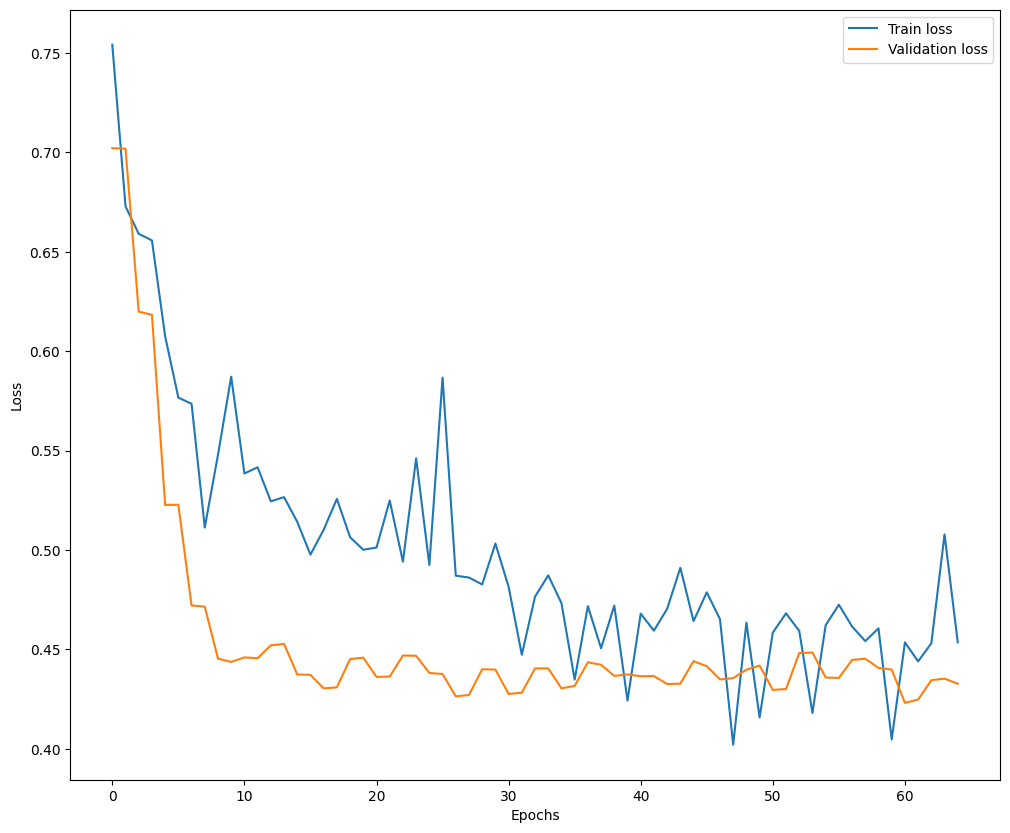

In [ ]:
plt.plot(smote_history.history['loss'], label='Train loss')
plt.plot(smote_history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Re-train

In [ ]:
smote_model = make_model()
smote_model.load_weights('smote_best_model.h5')

### Evaluate metrics

In [ ]:
train_predictions_smote = smote_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_smote = smote_model.predict(test_features, batch_size=BATCH_SIZE)

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
y_proba = smote_model.predict(test_features, batch_size=BATCH_SIZE)
y_pred = (y_proba > 0.5).astype(int).flatten()

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

# confusion matrix
tn, fp, fn, tp = confusion_matrix(test_labels, y_pred).ravel()

# performance metrics
sensitivity = tp / (tp + fn)  # sensitivity (recall)
specificity = tn / (tn + fp)  # specificity
accuracy = accuracy_score(test_target, y_pred)
auroc = roc_auc_score(test_target, y_proba)

# print results
print(f"sensitivity: {sensitivity: .3f}")
print(f"specificity: {specificity: .3f}")
print(f"accuracy: {accuracy: .3f}")
print(f"auroc: {auroc: .3f}")

sensitivity:  0.769
specificity:  0.758
accuracy:  0.758
auroc:  0.841


In [ ]:
print(tn, fp, fn, tp)

2613 835 53 176


brier_score, 0.14481999827463826


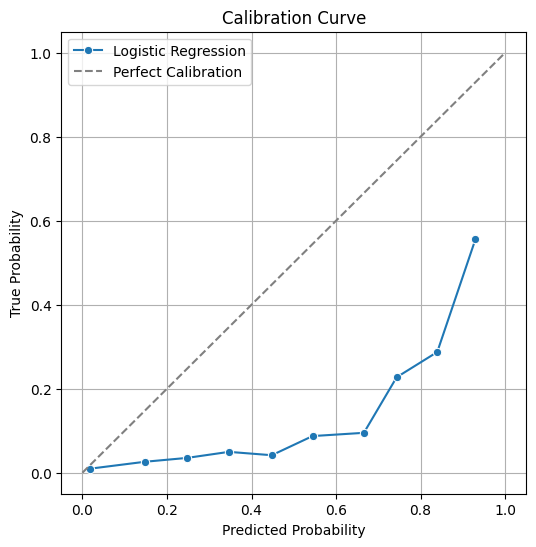

In [ ]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

# calibration curve
prob_true, prob_pred = calibration_curve(test_target, y_proba, n_bins=10)

# Brier score (a representative indicator for evaluating model calibration)
print(f"brier_score, {brier_score_loss(test_target, y_proba)}")

# visualization of the calibration curve
plt.figure(figsize=(6, 6))
sns.lineplot(x=prob_pred, y=prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

loss :  0.4163976311683655
compile_metrics :  319.0

ATAA Detected (True Negatives):  2666
ATAA Incorrectly Detected (False Positives):  782
ATAA Missed (False Negatives):  63
ATAA Detected (True Positives):  166
Total ATAA:  229


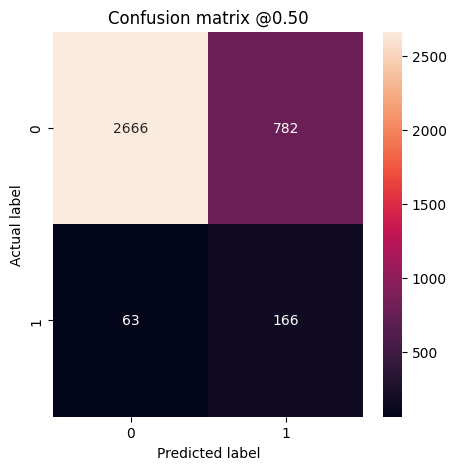

In [ ]:
smote_results = smote_model.evaluate(test_features, test_labels,
                                             batch_size=2*BATCH_SIZE, verbose=0)
for name, value in zip(smote_model.metrics_names, smote_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_smote)

In [ ]:
train_prediction = pd.DataFrame(train_predictions_smote)
train_prediction
test_prediction = pd.DataFrame(test_predictions_smote)
test_prediction

,0
0,0.363734
1,0.299357
2,0.000281
3,0.001712
4,0.320639
...,...
3672,0.000031
3673,0.809762
3674,0.002112
3675,0.383620


### Plot the ROC

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100])
  plt.ylim([0,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

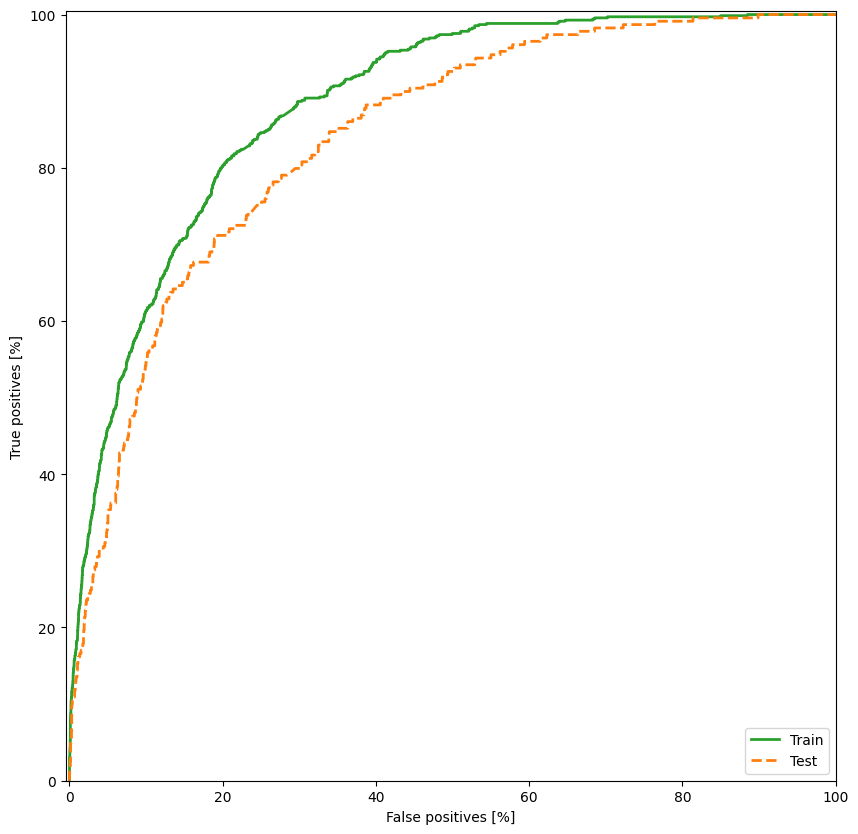

In [ ]:
plot_roc("Train", train_labels, train_predictions_smote, color=colors[2])
plot_roc("Test", test_labels, test_predictions_smote, color=colors[1], linestyle='--')
plt.legend(loc='lower right');
plt.grid(False)

plt.savefig('myfigure.pdf', transparent = True)

MCCV

In [ ]:
import numpy as np

# 통합
X = np.concatenate([train_features, val_features, test_features], axis=0)
y = np.concatenate([train_labels, val_labels, test_labels], axis=0)

# 결과 확인
X.shape, y.shape

((18382, 15), (18382,))

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import numpy as np

# 데이터 로드

# 모델 초기화
smote_model = make_model()
smote_model.load_weights('smote_best_model.h5')

# Monte Carlo Cross-Validation 설정
mccv = ShuffleSplit(n_splits=1000, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import numpy as np

# 평가 결과 저장
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []
auroc_scores = []

for train_index, test_index in mccv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 모델 예측
    y_proba = smote_model.predict(X_test, batch_size=BATCH_SIZE)
    y_pred = (y_proba > 0.5).astype(int)  # 임계값 0.5로 이진 분류

    # 혼동 행렬
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # 민감도 (Sensitivity, Recall)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    sensitivity_scores.append(sensitivity)

    # 특이도 (Specificity)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_scores.append(specificity)

    # AUROC
    auroc = roc_auc_score(y_test, y_proba)
    auroc_scores.append(auroc)

    # 정확도
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# 최종 평균 결과 출력
# accuracy_scores, np.mean(accuracy_scores)
# sensitivity_scores, np.mean(sensitivity_scores)
# specificity_scores, np.mean(specificity_scores)
# auroc_scores, np.mean(auroc_scores)
print('Accuracy:', np.mean(accuracy_scores))
print('Sensitivity:', np.mean(sensitivity_scores))
print('Specificity:', np.mean(specificity_scores))
print('AUROC:', np.mean(auroc_scores))


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2

In [ ]:
import numpy as np
from scipy.stats import t

def calculate_summary(scores):
    mean = np.mean(scores)
    std_dev = np.std(scores, ddof=1)
    n = len(scores)
    conf_interval = t.interval(0.95, n - 1, loc=mean, scale=std_dev / np.sqrt(n))
    return mean, std_dev, conf_interval

metrics = {
    "Accuracy": accuracy_scores,
    "Sensitivity": sensitivity_scores,
    "Specificity": specificity_scores,
    "AUROC": auroc_scores
}

summary = {metric: calculate_summary(scores) for metric, scores in metrics.items()}
summary

{'Accuracy': (np.float64(0.760705194451999),
  np.float64(0.006595284897713625),
  (np.float64(0.7602959261209543), np.float64(0.7611144627830437))),
 'Sensitivity': (np.float64(0.7825621472636618),
  np.float64(0.02433127164055797),
  (np.float64(0.7810522778507455), np.float64(0.7840720166765781))),
 'Specificity': (np.float64(0.7592490406766875),
  np.float64(0.0067995899528797005),
  (np.float64(0.7588270942596695), np.float64(0.7596709870937055))),
 'AUROC': (np.float64(0.8554051308445914),
  np.float64(0.010641331512957628),
  (np.float64(0.8547447863627462), np.float64(0.8560654753264365)))}